## <font color='blue'>**Naive Bayes Model**

### <font color='black'>**Learning Objectives**</font>
1. Load and explore datasets using Pandas, focusing on detecting duplicates and missing values.
2. Clean the dataset by removing duplicates and handling missing feature values.
3. Preprocess data through feature scaling or standardization.
4. Analyze the dataset for balance or imbalance.
Split the dataset into training and test sets.
5. Implement Naive Bayes from scratch for categorical data.
6. Evaluate model performance using accuracy, precision, recall, confusion matrix, and AUPRC.
8. Compare custom Naive Bayes implementation with Scikit-learn's CategoricalNB.



In [ ]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [ ]:
# downloading the Car Evaluation dataset from UC Irvine Machine Learning Repository
!wget -O dataset.zip https://archive.ics.uci.edu/static/public/19/car+evaluation.zip

--2024-08-11 12:16:45--  https://archive.ics.uci.edu/static/public/19/car+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [ <=>                ]   6.19K  --.-KB/s    in 0s      

2024-08-11 12:16:46 (53.5 MB/s) - ‘dataset.zip’ saved [6342]



In [ ]:
import zipfile

# Specify the name of the zip file
zip_file_path = 'dataset.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_dataset')  # Extract to a folder named 'extracted_dataset'

In [ ]:
# Specify the path to the extracted CSV file
csv_file_path = 'extracted_dataset/car.data'  # Replace with the actual CSV file name

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [ ]:
# getting keys of dataset stored as bunch type
df.keys()

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
# Assign the correct column names
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
# Get the unique class labels with their corresponding counts
class_counts = df['class'].value_counts().sort_index()

# Display the unique classes with their counts
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} instances")

Class acc: 384 instances
Class good: 69 instances
Class unacc: 1209 instances
Class vgood: 65 instances


In [ ]:
# Check for duplicate entries
duplicates = df.duplicated()

# Count the number of duplicate entries
num_duplicates = duplicates.sum()

print(f"Number of duplicate entries: {num_duplicates}")

Number of duplicate entries: 0


In [ ]:
# Remove duplicate entries
df = df.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of duplicate entries after removal: {df.duplicated().sum()}")

Number of duplicate entries after removal: 0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
# Remove entries with missing feature values
df = df.dropna()

# Verify that missing values are removed
print("Missing values after removal:")
print(df.isnull().sum())

Missing values after removal:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
#convert textual data to numeric since Naive Baies requires numeric data
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to hold the class mappings for each column
class_mappings = {}

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

    # Get the mapping of original classes to encoded labels
    mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Store the mapping in the dictionary
    class_mappings[column] = mappings

# Display the first few rows of the transformed DataFrame
print(df.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       2      2
1       3      3      0        0         2       0      2
2       3      3      0        0         1       1      2
3       3      3      0        0         1       2      2
4       3      3      0        0         1       0      2


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


In [ ]:
#Assign y to the “class” variable and X to the rest of the variables
y = df[['class']].astype('int')
X = df.drop('class',axis=1)

In [ ]:
# statistical description before scaling
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


##### <font color='red'>For Naive Bayes, particularly when working with categorical data or when implementing models like <font color='blue'>CategoricalNB</font> or <font color='blue'>MultinomialNB</font>, feature scaling or standardization is generally not necessary. This is because Naive Bayes models typically operate on categorical features or count-based data, where scaling doesn't affect the probability computations.</font>

#####<font color = 'red'>For Naive Bayes models, plotting a correlation matrix is generally not a necessity because Naive Bayes assumes that features are conditionally independent given the class label.

#####<font color='red'>For categorical features, Naive Bayes works based on the frequency of categories rather than their distribution. Outliers in categorical data are less of a concern because they don't affect the probability calculations directly.

In [ ]:
df['class'].value_counts()

,count
class,
2,1209
0,384
1,69
3,65


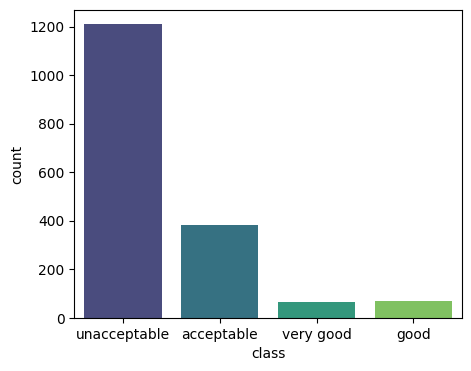

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe has a column named 'class' with values 0, 1, 2, 3
# Create a mapping dictionary
class_mapping = {
    0: 'acceptable',
    1: 'good',
    2: 'unacceptable',
    3: 'very good'
}

# Map the class labels to their corresponding names
df['class'] = df['class'].map(class_mapping)

# Set the figure size
plt.figure(figsize=(5, 4))

# Create the count plot
sns.countplot(data=df, x="class", hue="class", palette='viridis')

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(type(X_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
print(X_train.shape)  # (num_samples_train, num_features)
print(y_train.shape)  # (num_samples_train,)
print(X_test.shape)   # (num_samples_test, num_features)
print(y_test.shape)   # (num_samples_test,)

(1295, 6)
(1295, 1)
(432, 6)
(432, 1)


In [ ]:
# Convert y_train, y_val, and y_test to 1D NumPy arrays
y_train = y_train.ravel()  # or y_train.squeeze()
y_test = y_test.ravel()    # or y_test.squeeze()

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        # Initialize dictionaries to store prior probabilities and likelihoods
        self.prior_prob = {}  # Prior probabilities for each class
        self.likelihoods = {}  # Likelihoods for feature values given each class

    def fit(self, X, y):
        # Identify unique classes and number of features from the training data
        self.classes = np.unique(y)  # Unique class labels
        self.num_features = X.shape[1]  # Number of features

        # Compute prior probabilities based on class frequencies
        self.prior_prob = self._calculate_prior_probabilities(y)

        # Compute likelihoods for each feature value given each class
        self.likelihoods = self._calculate_likelihoods(X, y)

    def _calculate_prior_probabilities(self, y):
        # Calculate prior probabilities of each class
        classes, counts = np.unique(y, return_counts=True)  # Get unique classes and their counts
        total_count = len(y)  # Total number of samples
        # Compute prior probability for each class and return as a dictionary
        return dict(zip(classes, counts / total_count))

    def _calculate_likelihoods(self, X, y):
        # Initialize a dictionary to store likelihoods for each class and feature
        likelihoods = {cls: {i: {} for i in range(self.num_features)} for cls in self.classes}

        for cls in tqdm(self.classes):
            # Filter the training data for the current class
            X_cls = X[y == cls]
            num_cls = X_cls.shape[0]  # Number of samples for this class

            for feature_idx in range(self.num_features):
                # Calculate feature value counts and their probabilities within this class
                feature_values, counts = np.unique(X_cls[:, feature_idx], return_counts=True)
                # Store the likelihoods as a dictionary of feature values and their probabilities
                likelihoods[cls][feature_idx] = dict(zip(feature_values, counts / num_cls))

        return likelihoods

    def predict(self, X):
        # List to store the predicted class for each sample
        predictions = []

        for x in X:
            # Initialize scores for each class with the log of the prior probability
            class_scores = {cls: np.log(prior) for cls, prior in self.prior_prob.items()}

            for cls in self.classes:
                for feature_idx, value in enumerate(x):
                    # Get the likelihoods of the feature value given the class
                    feature_likelihoods = self.likelihoods[cls].get(feature_idx, {})
                    # Update the class score by adding the log of the feature likelihood
                    # Use a small value (1e-10) if the feature value was not seen during training
                    class_scores[cls] += np.log(feature_likelihoods.get(value, 1e-10))

            # Predict the class with the highest score
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return np.array(predictions)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize the custom Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

100%|██████████| 4/4 [00:00<00:00, 2420.26it/s]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Make predictions on the test set
y_test_pred = nb_classifier.predict(X_test)

Confusion Matrix:
[[ 66   5  34   0]
 [ 11   4   0   1]
 [ 10   0 280   0]
 [ 10   0   0  11]]

Classification Report:
              precision    recall  f1-score   support

  acceptable       0.68      0.63      0.65       105
        good       0.44      0.25      0.32        16
unacceptable       0.89      0.97      0.93       290
   very good       0.92      0.52      0.67        21

    accuracy                           0.84       432
   macro avg       0.73      0.59      0.64       432
weighted avg       0.83      0.84      0.83       432



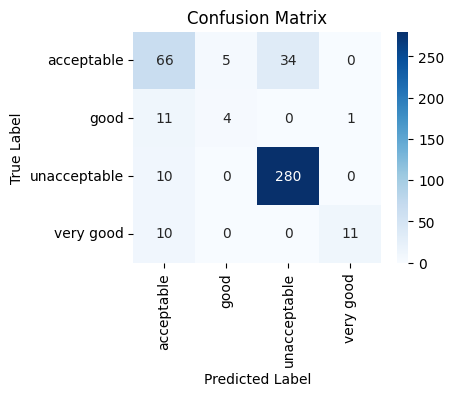

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are your test labels and predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=nb_classifier.classes)

# Convert class labels to strings if they are numeric (replace this with actual class names if needed)
class_names = ['acceptable', 'good', 'unacceptable', 'very good']  # Replace these with your actual class names

# Generate classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Handling the class imbalance problem
#SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic samples for the minority class.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Fit the model on the training data
nb_classifier.fit(X_train_resampled, y_train_resampled)

100%|██████████| 4/4 [00:00<00:00, 1335.45it/s]


In [ ]:
# Make predictions on the test set
y_test_pred = nb_classifier.predict(X_test)

In [ ]:
print(y_test_pred.shape)
print(y_test.shape)

(432,)
(432,)


Confusion Matrix:
[[ 89  10   0   6]
 [  0  10   0   6]
 [ 40   1 249   0]
 [  0   0   0  21]]

Classification Report:
              precision    recall  f1-score   support

  acceptable       0.69      0.85      0.76       105
        good       0.48      0.62      0.54        16
unacceptable       1.00      0.86      0.92       290
   very good       0.64      1.00      0.78        21

    accuracy                           0.85       432
   macro avg       0.70      0.83      0.75       432
weighted avg       0.89      0.85      0.86       432



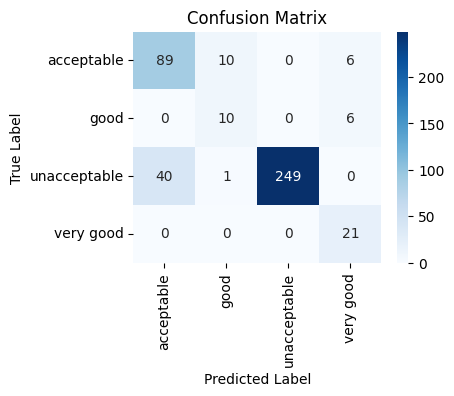

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are your test labels and predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=nb_classifier.classes)

# Convert class labels to strings if they are numeric (replace this with actual class names if needed)
class_names = ['acceptable', 'good', 'unacceptable', 'very good']  # Replace these with your actual class names

# Generate classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

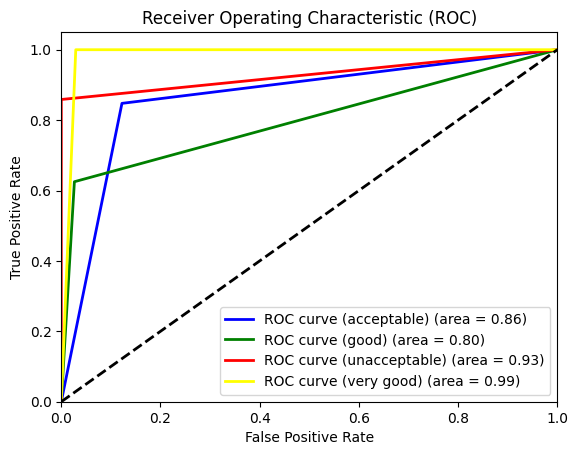

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are your test labels and predictions

# Binarize the output for ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = label_binarize(y_test_pred, classes=np.unique(y_test_pred))
n_classes = y_test_binarized.shape[1]

# Define your class names (replace these with your actual class names)
class_names = ['acceptable', 'good', 'unacceptable', 'very good']

# ROC curve and ROC AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'green', 'red', 'yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#CategoricalNB classifier from ScikitLearn Library
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# Initialize the CategoricalNB classifier
cat_nb_classifier = CategoricalNB()

# Fit the model on the training data
cat_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = cat_nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


Confusion Matrix:
[[ 66   5  34   0]
 [ 12   4   0   0]
 [ 10   0 280   0]
 [ 15   0   0   6]]

Classification Report:
              precision    recall  f1-score   support

  acceptable       0.64      0.63      0.63       105
        good       0.44      0.25      0.32        16
unacceptable       0.89      0.97      0.93       290
   very good       1.00      0.29      0.44        21

    accuracy                           0.82       432
   macro avg       0.74      0.53      0.58       432
weighted avg       0.82      0.82      0.81       432



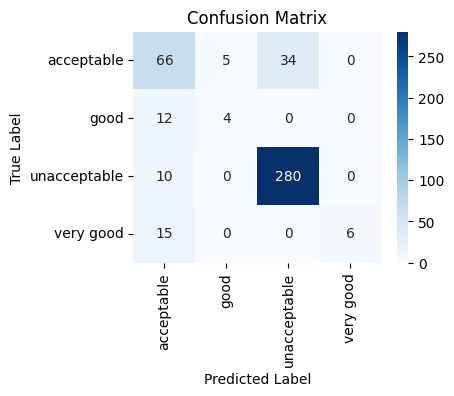

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are your test labels and predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=nb_classifier.classes)

# Convert class labels to strings if they are numeric (replace this with actual class names if needed)
class_names = ['acceptable', 'good', 'unacceptable', 'very good']  # Replace these with your actual class names

# Generate classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Lab Assignment 3**


### <font color='blue'>Objective: </font>

In this assignment, you will learn how to handle and preprocess a real-world dataset, including dealing with duplicates, missing values, and feature scaling. You'll implement the Naive Bayes classifier from scratch, selecting appropriate likelihood distributions for different feature types. You'll also compare your implementation with an existing model (MixedNB) and assess its performance using various metrics. Finally, you'll learn to effectively evaluate and visualize the results to communicate your findings.

### <font color='blue'> Task - 1 [Marks 0] </font>:
Load the [Secondary Mushroom](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset) dataset using Pandas. This dataset has 20 features, and the target variable is binary, which indicates if the mushroom is edible or not


In [ ]:
#Download the dataset and make the dataframe with pandas

#Solution code

### <font color='blue'> Task - 2 [Marks 1] </font>:
:
Check if there are duplicate entries in the data and missing values of features. Remove duplicate entries and handle entries having missing feature values using Imputation method(Like Mean, Mediaan, Mode etc).  

In [ ]:
# Solution code

### <font color='blue'> Task - 3 [Marks 3] </font>:

1.Preprocess the dataset as required, i.e. feature scaling or standardization

2.Is the dataset balanced or imbalanced?

3.Split data into training and test set

In [ ]:
# Solution code

### <font color='blue'> Task - 4 [Marks 7] </font>:

Implement Naive Bayes’ classifier from scratch on this dataset, by appropriately choosing the likelihood distribution for each feature. This dataset has mixed feature types (i.e. continuous and categorical features), and the likelihood distribution of each feature must consider the corresponding feature type. Mention the type of distribution you chose for each feature’s likelihood.  


In [ ]:
# Solution code

### <font color='blue'> Task - 5 [Marks 2] </font>:

Report the classification performance using the appropriate metrics (accuracy, precision, recall, confusion matrix, AUPRC) using suitable plots.

In [ ]:
# Solution code

### <font color='blue'> Task - 6 [Marks 5] </font>:
Fit a Naive Bayes’ model for this dataset using MixedNB (from the package https://pypi.org/project/mixed-naive-bayes/)



In [ ]:
# Solution code

### <font color='blue'> Task - 7 [Marks 2] </font>:

Compare the performance obtained by your implementation with that obtained using MixedNB

In [ ]:
# Solution code